# **Analysis of Consumer Behaviour to New Products**

## **Introduction**

This project aim to have a model to predict consumer behaviour to new product at 75% of accuracy.

### **Goal**

Having a model to predict customer behavior using machine learning that have at least 75% of accuracy.

### **Stages**

The stages of this project are as below:

1. Open the data file and study its general information.

2. Prepare the data

- Explore the data and check for anomalies

3. Devide the data into three categories: Training set, Validation set, and Test set.
4. Check the model quality using by changing the hyperparameter.
5. Check the model quality using test set.
6. Run the sanity check.
7. Draw the conclusion.


### **Data Content**

Costumer behaviour consist of columns as below:

1. calls — number of calls
2. minutes — total call duration in minutes
3. messages — number of text messages
4. mb_used — internet usage traffic in MB
5. is_ultimate — package for the current month (Ultimate - 1, Surf - 0)

## **Data Loading and Initial Examination**

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
# Loading dataset

df = pd.read_csv('/content/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


## **Data Preparation**

In [3]:
df.shape

(3214, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df_eda = df.copy()
df_eda['is_ultra'] = df_eda['is_ultra'].astype(str)
df_eda

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [8]:
df_eda_1 = df_eda.pivot_table(index='is_ultra', values='calls', aggfunc='count').reset_index()
df_eda_1.columns = ['is_ultra', 'trx']
df_eda_1

,is_ultra,trx
0,0,2229
1,1,985


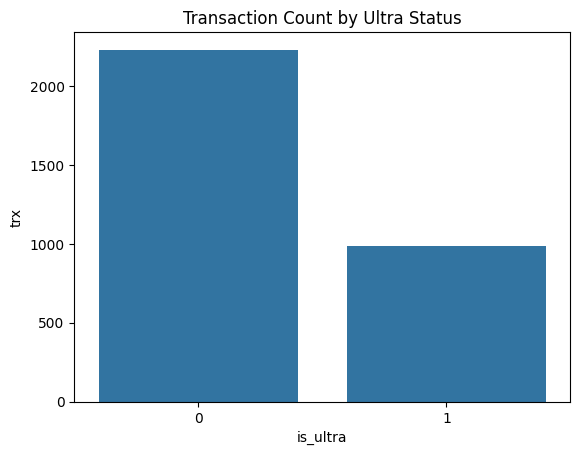

In [13]:
sns.barplot(data=df_eda_1, x='is_ultra', y='trx')
plt.title('Transaction Count by Ultra Status')
plt.show()

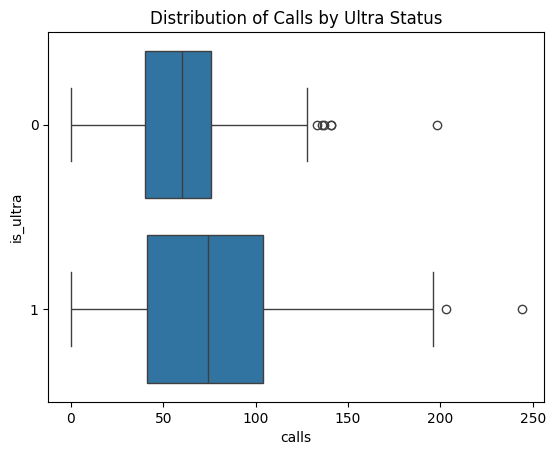

In [14]:
sns.boxplot(data=df_eda, x='calls', y='is_ultra')
plt.title('Distribution of Calls by Ultra Status')
plt.show()


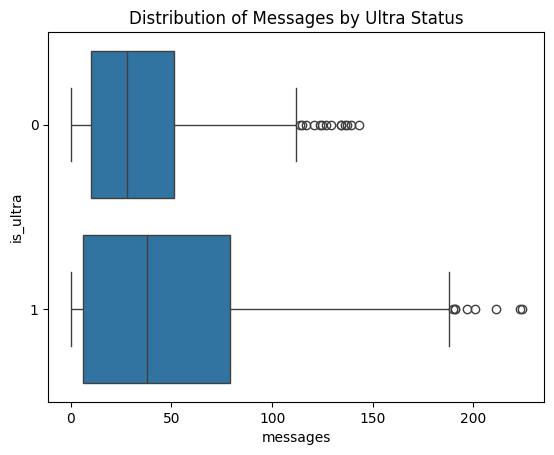

In [15]:
sns.boxplot(data=df_eda, x='messages', y='is_ultra')
plt.title('Distribution of Messages by Ultra Status')
plt.show()

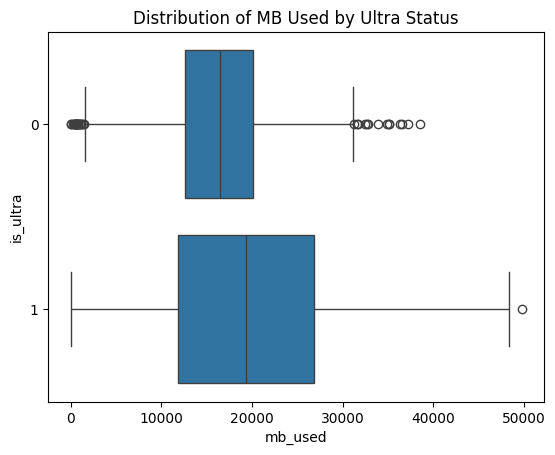

In [16]:
sns.boxplot(data=df_eda, x='mb_used', y='is_ultra')
plt.title('Distribution of MB Used by Ultra Status')
plt.show()

## **Data Setting**

In order to run machine learning we have to devided the data into two, they are features and target. in this case the the features columns are everything but is_ultra, and the target column consist only is_ultra.

In [17]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

In [18]:
features.head()

,calls,minutes,messages,mb_used
0,40.0,311.90,83.0,19915.42
1,85.0,516.75,56.0,22696.96
2,77.0,467.66,86.0,21060.45
3,106.0,745.53,81.0,8437.39
4,66.0,418.74,1.0,14502.75


In [19]:
target.head()

0    0
1    0
2    0
3    1
4    0
Name: is_ultra, dtype: int64

Seems like the features and target well devided.

Since we have a lot of data, we will have the percentage as below:

- 60% data for training set.
- 20% data for test set.
- 20% data for validation set.

Now split each of them into train model and test model using sklearn train_test_split

In [20]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=12)


Then devide again into test and validation model using sklearn train_test_split

In [21]:
features_val, features_test, target_val, target_test = train_test_split(features_test, target_test, test_size=0.5, random_state=12)


In [22]:
features_train.shape

(1928, 4)

In [23]:
features_test.shape

(643, 4)

In [24]:
features_val.shape

(643, 4)

## **Developping Machine Learning Model**

### **Model Trial**

#### **Logistic Regression**

In [25]:
# Define Model

lr = LogisticRegression()
# Training the model

lr.fit(features_train, target_train)

LogisticRegression()

In [26]:
# Training prediction
target_train_pred = lr.predict(features_train)

In [27]:
# Training Result
pd.DataFrame({
    'actual':target_train,
    'prediction': target_train_pred
})

,actual,prediction
619,0,0
2935,1,1
920,1,0
773,1,0
2661,1,0
...,...,...
1987,0,0
1283,0,0
1414,0,0
1691,0,0


In [28]:
# Training accuracy

accuracy_score(target_train, target_train_pred)

0.7608921161825726

In [29]:
# Validation Prediction
target_val_pred = lr.predict(features_val)

In [30]:
# Validation Accuracy
accuracy_score(target_val, target_val_pred)

0.7356143079315708

#### **Decision Tree Model**

In [31]:
# Define Model
dt = DecisionTreeClassifier()

# Training The Model
dt.fit(features_train, target_train)

DecisionTreeClassifier()

In [32]:
# Training prediction
target_train_pred_dt = dt.predict(features_train)

In [33]:
# Training Result
pd.DataFrame({
    'actual':target_train,
    'prediction': target_train_pred_dt
})

,actual,prediction
619,0,0
2935,1,1
920,1,1
773,1,1
2661,1,1
...,...,...
1987,0,0
1283,0,0
1414,0,0
1691,0,0


In [34]:
# Training accuracy
accuracy_score(target_train, target_train_pred_dt)

1.0

In [35]:
# Validation Prediction
target_train_pred_dt = dt.predict(features_val)

In [36]:
# Validation Accuracy
accuracy_score(target_val, target_train_pred_dt)

0.7122861586314152

#### **Random Forest Model**

In [37]:
# Define Model
rf = RandomForestClassifier()

# Training The Model
rf.fit(features_train, target_train)

RandomForestClassifier()

In [38]:
# Training prediction
target_train_pred_rf = rf.predict(features_train)

In [39]:
# Training Result
pd.DataFrame({
    'actual':target_train,
    'prediction': target_train_pred_rf
})

,actual,prediction
619,0,0
2935,1,1
920,1,1
773,1,1
2661,1,1
...,...,...
1987,0,0
1283,0,0
1414,0,0
1691,0,0


In [40]:
# Training accuracy
accuracy_score(target_train, target_train_pred_rf)

1.0

In [41]:
# Validation Prediction
target_train_pred_rf = rf.predict(features_val)

In [42]:
# Validation Accuracy
accuracy_score(target_val, target_train_pred_rf)

0.7853810264385692

### **Tuning Hyperparameter**

Tuning process is basically just like training model above but with additional parameter to have detail process of model training. Using hyperparameter we can adjust the n_estimator, or the depth of the tree. Using Random Forest Model we already have 78% of accuracy, but probably we can train better using hyperparameter.

#### **Random Forest Model**

This model chosed because the other two has lower accuracy.


In [43]:
# Define Model and hyperparameter
rf1 = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=5)

# Training The Model
rf1.fit(features_train, target_train)

RandomForestClassifier(max_depth=5, n_estimators=2000)

In [44]:
# Training prediction
target_train_pred_rf1 = rf1.predict(features_train)

In [45]:
# Training Result
pd.DataFrame({
    'actual':target_train,
    'prediction': target_train_pred_rf1
})

,actual,prediction
619,0,0
2935,1,1
920,1,1
773,1,0
2661,1,1
...,...,...
1987,0,0
1283,0,0
1414,0,0
1691,0,0


In [46]:
# Training accuracy
accuracy_score(target_train, target_train_pred_rf1)

0.8366182572614108

In [47]:
# Validation Prediction
target_train_pred_rf1 = rf1.predict(features_val)

In [48]:
# Validation Accuracy
accuracy_score(target_val, target_train_pred_rf1)

0.7838258164852255

### **Sanity Check**

In [49]:
mean = target.mean()
mean

0.30647168637212197

In [50]:
predictions = pd.Series(target.mean(), index=target.index)
mse = mean_squared_error(target, predictions)
print('MSE:', mse)

MSE: 0.21254679182434966


In [51]:
rmse = mse ** 0.5

print('RMSE:', rmse)

RMSE: 0.46102797293043907


## **Conclusion**

1. The goal of the project is to find model to run with 75% of accuracy for new product.
2. Data must be split for machine learning as below:

- 60% data for training set.
- 20% data for test set.
- 20% data for validation set.

2. We run 3 types of model there are

- Logistic Regression with accuracy of 73.5%
- Decision Tree Model with accuracy of 71.6%
- Random Forest Model with accuracy of 78.2%

3. After we found out that Random Forest Model has higher percentage, lets run tuning hyperparameter on it with parameters below:

- n_estimators=2000
- criterion='gini'
- max_depth=5
- These parameters add up accuracy to 78.3%

4. The sanity check has been done with margin or error of 0.461
5. Therefore the best model to be used is: Random Forest Model with hyperparameters as mentioned in point 3.